In [0]:
import os
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [0]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# Label encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [0]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential

num_classes = 10

# Neuronal net
"""
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(28 * 28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
"""
# Conv net
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200, validation_data=(X_val,y_val), verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.2482 - accuracy: 0.9282 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 2/10
 - 1s - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.0648 - val_accuracy: 0.9818
Epoch 3/10
 - 1s - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0526 - val_accuracy: 0.9867
Epoch 4/10
 - 1s - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 5/10
 - 1s - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 6/10
 - 1s - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 7/10
 - 1s - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0367 - val_accuracy: 0.9902
Epoch 8/10
 - 1s - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0398 - val_accuracy: 0.9890
Epoch 9/10
 - 1s - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 10/10
 - 1s - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0332 - val_accuracy: 0.9920


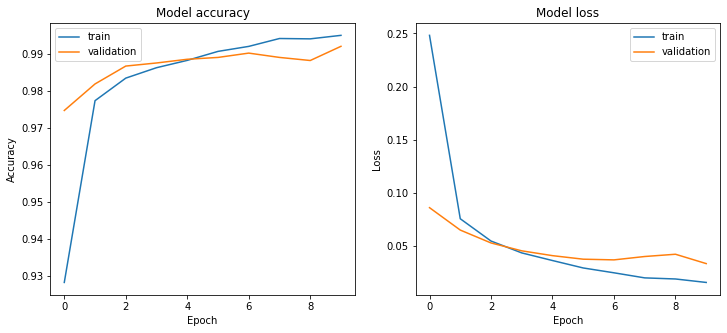

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.legend(['train', 'validation'], loc='best')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.set_title('Model accuracy');

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.legend(['train', 'validation'], loc='best')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.set_title('Model loss');

In [68]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.01%


The 8211 sample in the test set is: 6


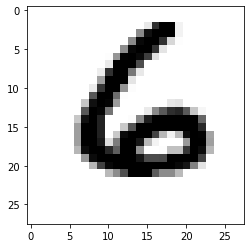

In [70]:
Y_predict = model.predict(X_test)
idx = np.random.randint(X_test.shape[0])
plt.imshow(X_test[idx][:,:,0], cmap='gray_r');
print("The {} sample in the test set is: {}".format(idx, Y_predict[idx].argmax()))

In [0]:
model.save('keras.h5')

In [72]:
# Prepare the model for web format
%mkdir -p model
!pip install tensorflowjs 
!tensorflowjs_converter --input_format keras keras.h5 model/

In [73]:
# Download model
from google.colab import files
!zip -r model.zip model
files.download('model.zip')

updating: model/ (stored 0%)
updating: model/group1-shard1of1.bin (deflated 7%)
updating: model/model.json (deflated 74%)
